In [12]:
pip install matplotlib pandas mplfinance seaborn 

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### VISUALIZAR EL FICHERO A ANALIZAR ###

In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
file_path = "../data/raw/AAPL_daily.csv"  # Reemplaza por el archivo deseado

# Cargar los datos
data = pd.read_csv(file_path)

# Convertir 'date' a formato datetime
data['date'] = pd.to_datetime(data['date'])

# Visualizar las primeras filas
print(data.head())


        date    open    high       low   close       volume
0 2024-12-20  248.04  255.00  245.6900  254.49  147495267.0
1 2024-12-19  247.50  252.00  247.0949  249.79   60882264.0
2 2024-12-18  252.16  254.28  247.7400  248.05   56774101.0
3 2024-12-17  250.08  253.83  249.7800  253.48   51356360.0
4 2024-12-16  247.99  251.38  247.6500  251.04   51694753.0


### GRÁFICO DE PRECIOS HISTÓRICOS ###

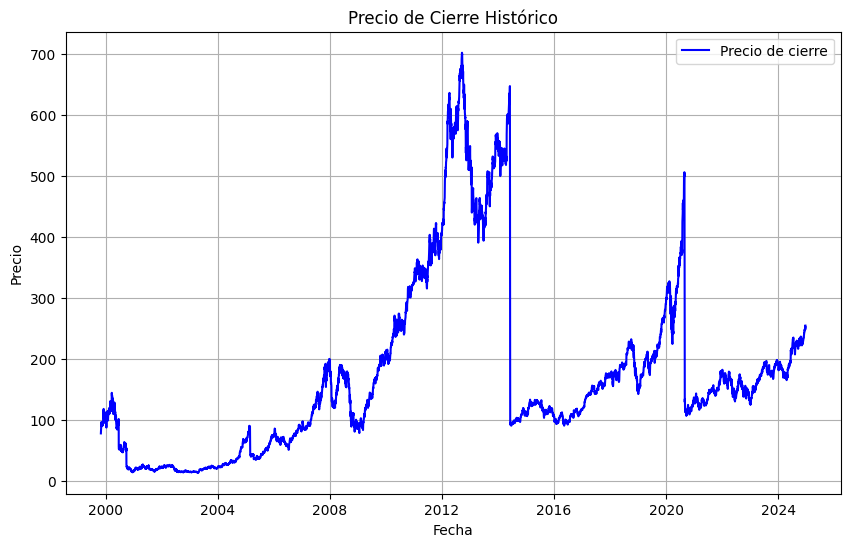

In [3]:
# Graficar precio de cierre
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['close'], label='Precio de cierre', color='blue')
plt.title("Precio de Cierre Histórico")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.show()


### GRÁFICO DE VOLUMEN DE OPERACIONES ###

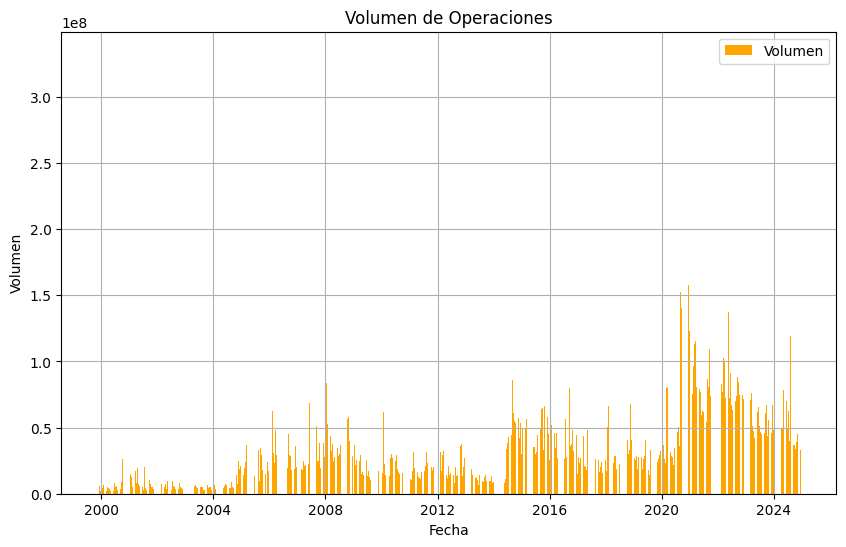

In [4]:
# Graficar volumen de operaciones
plt.figure(figsize=(10, 6))
plt.bar(data['date'], data['volume'], color='orange', label='Volumen')
plt.title("Volumen de Operaciones")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.legend()
plt.grid()
plt.show()


### CALCULAR Y HACER GRÁFICAS DE INDICADORES TÉCNICOS ###

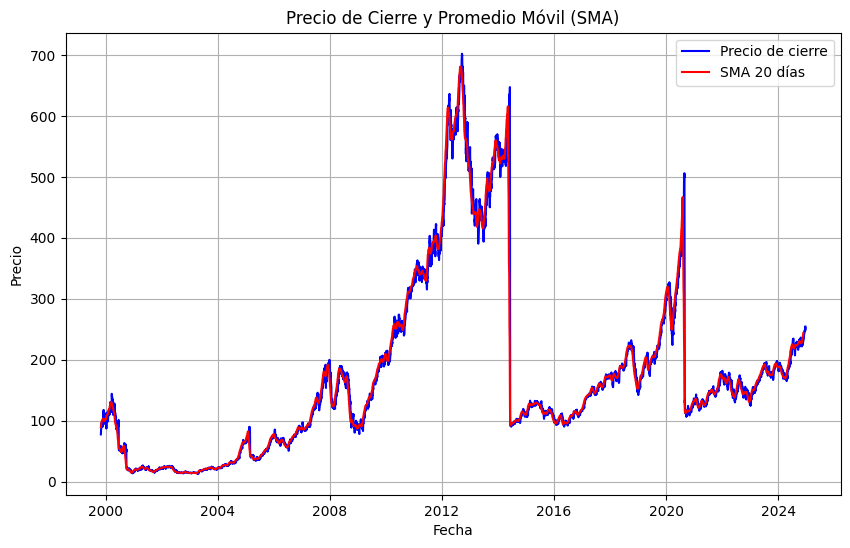

In [5]:
# Calcular SMA (20 días)
data['SMA_20'] = data['close'].rolling(window=20).mean()

# Graficar SMA junto con precios
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['close'], label='Precio de cierre', color='blue')
plt.plot(data['date'], data['SMA_20'], label='SMA 20 días', color='red')
plt.title("Precio de Cierre y Promedio Móvil (SMA)")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid()
plt.show()


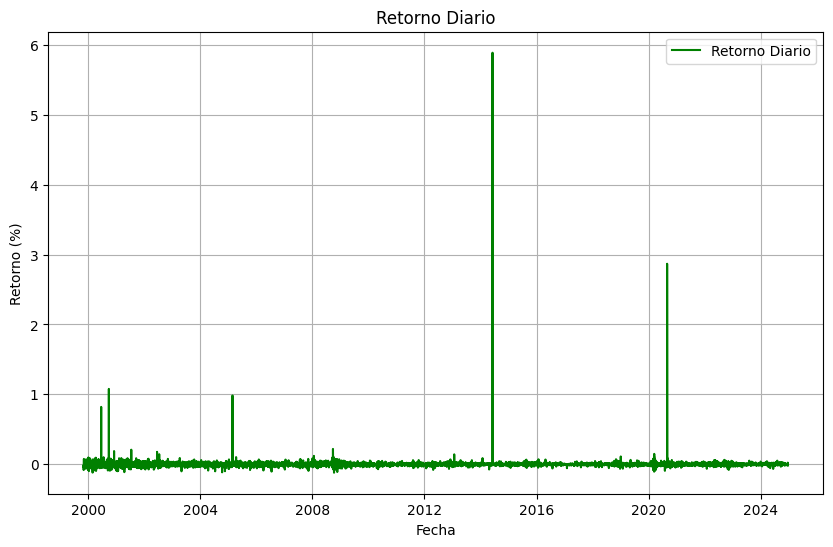

In [6]:
# Calcular retorno diario
data['daily_return'] = data['close'].pct_change()

# Graficar retornos diarios
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['daily_return'], label='Retorno Diario', color='green')
plt.title("Retorno Diario")
plt.xlabel("Fecha")
plt.ylabel("Retorno (%)")
plt.legend()
plt.grid()
plt.show()


### GRÁFICO DE VELAS ### 

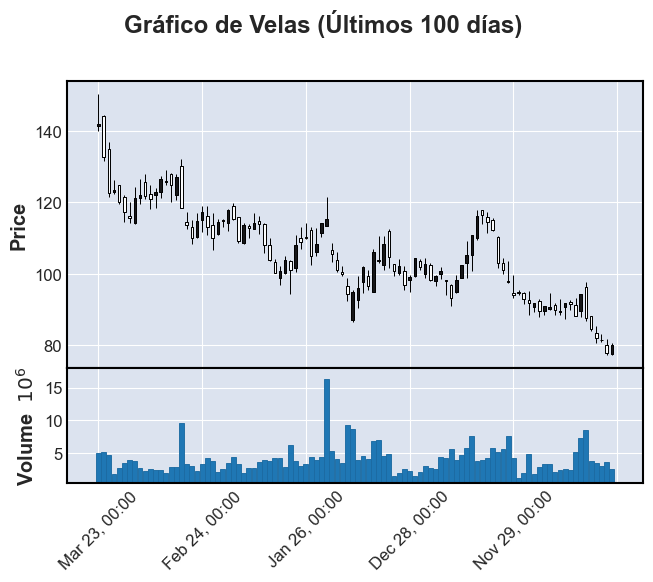

In [10]:
import pandas as pd
import mplfinance as mpf

# Cargar los datos
file_path = "../data/raw/AAPL_daily.csv"
data = pd.read_csv(file_path)

# Convertir 'date' a índice datetime
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Seleccionar columnas necesarias para el gráfico
data = data[['open', 'high', 'low', 'close', 'volume']]

# Limitar los datos a los últimos 100 días
limited_data = data.tail(100)

# Graficar velas con el rango limitado
mpf.plot(limited_data, type='candle', volume=True, title="Gráfico de Velas (Últimos 100 días)")


### MAPA DE CALOR DE CORRELACIONES ###

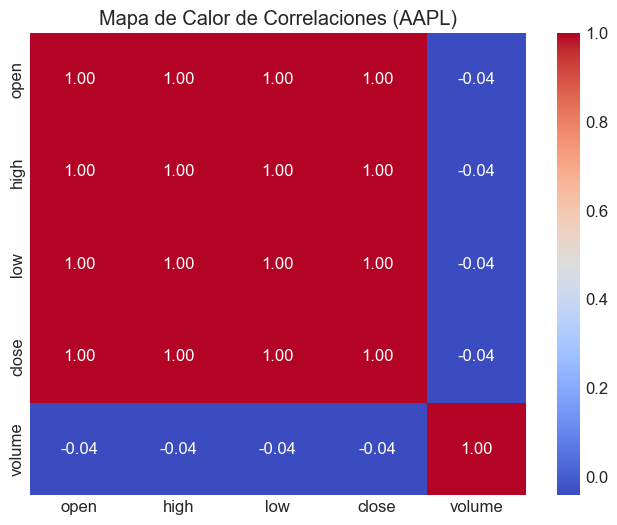

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv("../data/raw/AAPL_daily.csv")

# Calcular la matriz de correlación
correlation_matrix = data[['open', 'high', 'low', 'close', 'volume']].corr()

# Crear un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones (AAPL)")
plt.show()
